<a href="https://colab.research.google.com/github/tarikul12/TensorFlow/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Neural Network*

The **sigmoid** activation function is a commonly used activation
function in neural networks, especially for binary classification tasks. It maps input values to an output range between 0 and 1, making it useful for predicting probabilities

The **tanh** (hyperbolic tangent) activation function is commonly used in neural networks, especially in recurrent neural networks (**RNNs**). It squashes the input values to be between -1 and 1.

The **ReLU** (Rectified Linear Unit) activation function is one of the most widely used activation functions in **deep learning**, especially for neural networks

The **Softmax** activation function is commonly used in the ***output layer ***of neural networks, particularly in **multi-class** classification problems. It converts raw output scores, or logits, from the neural network into probabilities that sum to 1.

In machine learning, ***batch size*** refers to the number of training examples utilized in one iteration of model training. When training a model, the dataset is often too large to be fed into the model all at once. Instead, the **data is divided into smaller batches**, and the model parameters are updated based on these smaller chunks of data.

Machine learning works by training models on data, allowing them to identify patterns and make predictions. The model improves performance over time through algorithms that adjust based on new input data.**verbose**

In [ ]:
#pakage import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
#dataset load
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [ ]:
#normalize data
x_train =x_train.reshape(-1,28*28).astype("float32")/255.0
x_test =x_test.reshape(-1,28*28).astype("float32")/255.0

In [ ]:
# Model create
model = keras.Sequential(
    [
        keras.Input(shape=(28*28,)),
        #layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# compile model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],

)

In [ ]:
h = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_split=0.2 )

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6298 - loss: 1.2139 - val_accuracy: 0.8913 - val_loss: 0.3696
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8925 - loss: 0.3694 - val_accuracy: 0.9133 - val_loss: 0.2988
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9075 - loss: 0.3134 - val_accuracy: 0.9255 - val_loss: 0.2554
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9212 - loss: 0.2659 - val_accuracy: 0.9334 - val_loss: 0.2304
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9328 - loss: 0.2307 - val_accuracy: 0.9408 - val_loss: 0.2061


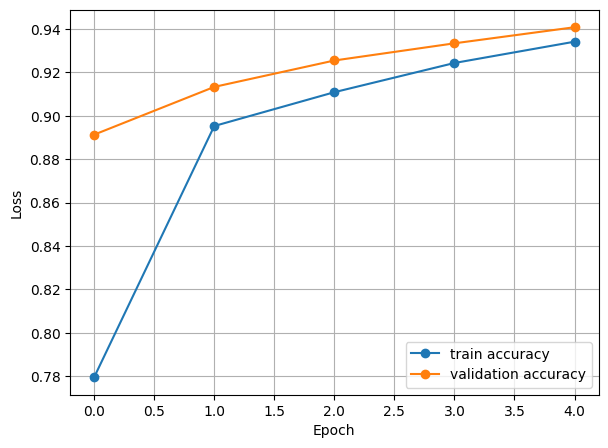

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'o-',label='train accuracy')
plt.plot(h.history['val_accuracy'],'o-',label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9314 - loss: 0.2435
0.9391999840736389


In [ ]:
def test(i):
    img = x_test[i]
    predictions = model.predict(img.reshape(-1,784))

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


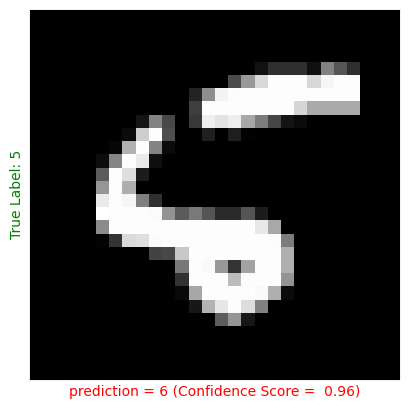

In [ ]:
test(8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


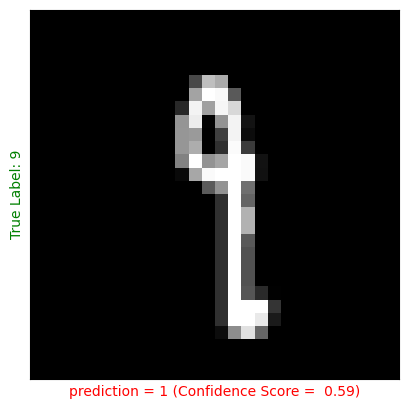

In [ ]:
test(4500)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


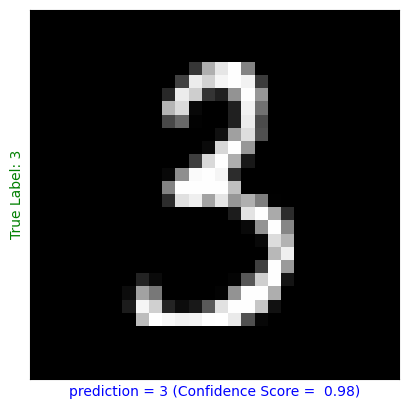

In [ ]:

test(76)